         Date    Product  Sales  Quantity Region
0  01-01-2023  Product A    200         4  North
1  02-01-2023  Product B    150         3  South
2  03-01-2023  Product A    220         5  North
3  04-01-2023  Product C    300         6   East
4  05-01-2023  Product B    180         4   West
Date        0
Product     0
Sales       0
Quantity    0
Region      0
dtype: int64
            Sales   Quantity
count   16.000000  16.000000
mean   237.500000   5.375000
std     64.031242   1.746425
min    150.000000   3.000000
25%    187.500000   4.000000
50%    225.000000   5.500000
75%    302.500000   7.000000
max    340.000000   8.000000
     Product  Sales  Quantity
0  Product A   1350        33
1  Product B    850        17
2  Product C   1600        36


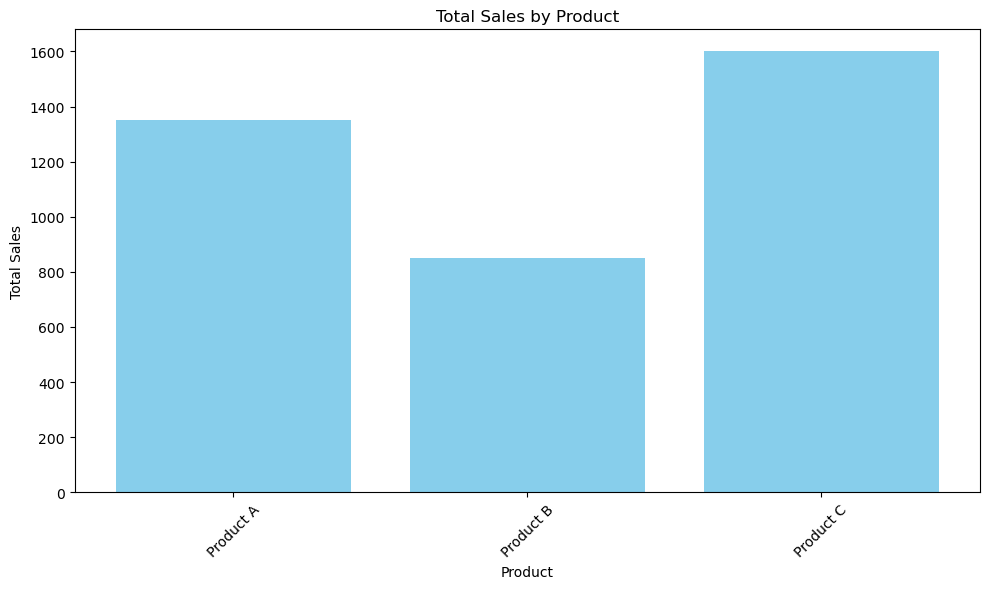

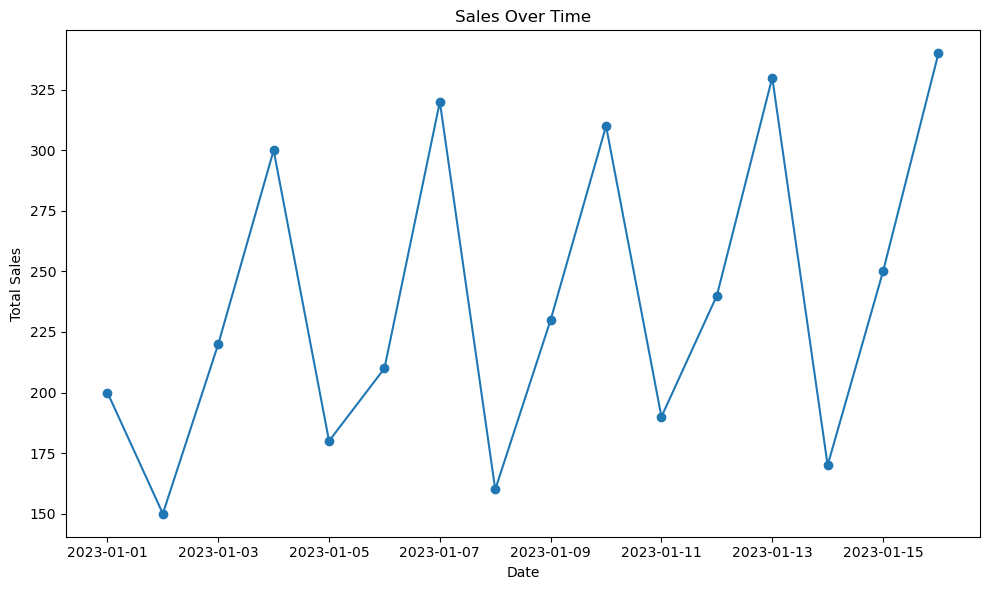

Product  Product A  Product B  Product C
Region                                  
East             0          0       1600
North         1350          0          0
South            0        480          0
West             0        370          0
             Sales  Quantity
Sales     1.000000  0.944922
Quantity  0.944922  1.000000


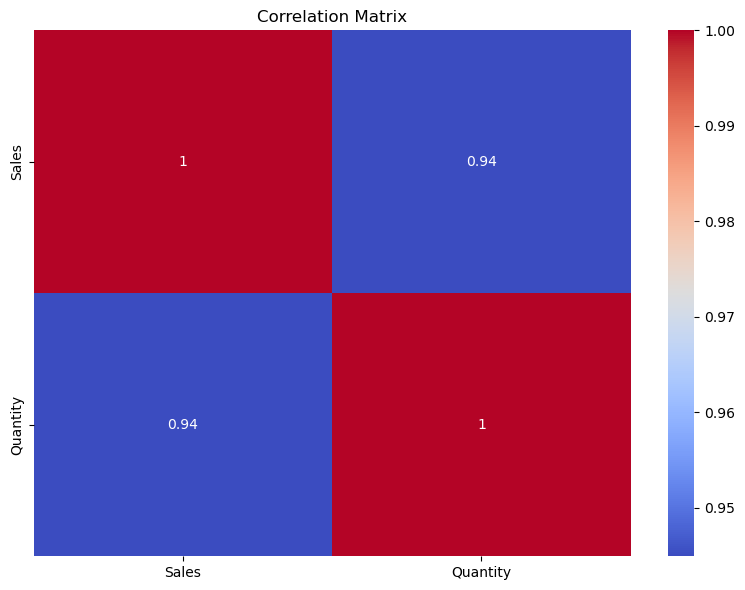

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('sales_data.csv')

print(df.head())
print(df.isnull().sum())

df['Sales'] = df['Sales'].fillna(df['Sales'].mean())
df.dropna(subset=['Product', 'Quantity', 'Region'], inplace=True)

print(df.describe())

product_summary = df.groupby('Product').agg({
    'Sales': 'sum',
    'Quantity': 'sum'
}).reset_index()

print(product_summary)

plt.figure(figsize=(10, 6))
plt.bar(product_summary['Product'], product_summary['Sales'], color='skyblue')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.title('Total Sales by Product')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
sales_over_time = df.groupby('Date').agg({'Sales': 'sum'}).reset_index()

plt.figure(figsize=(10, 6))
plt.plot(sales_over_time['Date'], sales_over_time['Sales'], marker='o')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Sales Over Time')
plt.tight_layout()
plt.show()

pivot_table = df.pivot_table(
    values='Sales',
    index='Region',
    columns='Product',
    aggfunc='sum',
    fill_value=0
)

print(pivot_table)

correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


